# Newton-Verfahren

## Auftrag

Implementieren Sie das Newton-Verfahren zur Bestimmung von Nullstellen von Funktionen.
(Dabei soll die Funktion als Sympy-Objekt eingegeben werden, so dass Sie mit Sympy die Ableitung davon bestimmen können.)

* Beschreiben Sie das Verfahren.
* Erstellen Sie eine Funktion `solve(f, x0)`, die eine Nullstelle von $f$ berechnet.
* Wenden Sie das Verfahren auf einige Beispiele an.
* Untersuchen Sie (empirisch), wie schnell das Verfahren konvergiert, wenn $x_0$ genügend nahe bei einer Nullstelle ist.

## Umgebung

Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein.

* SymPy
* Matplotlib
* PrettyTable

In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [94]:
pip install PTable

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### SymPy

**SymPy** ist eine Python-Programmierbibliothek für symbolische mathematische Berechnungen *(Sympy, 2019)*.

### Matplotlib

Bei **Matplotlib** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. **Matplotlib** ermöglicht eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, dass sie für fast alle Anwendungsbereiche geeignet sind *(Matplotlib, 2019)*.

### PrettyTable

**PrettyTable** ist eine Python-Programmierbibliothek, die es ermöglicht einfache ASCII-Tabellen mittels Python zu generieren *(PTable, 2015)*.

### Numpy

Bei **NumPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht eine einfache Handhabung von grossen mehrdimensionalen Arrays. Dazu bietet NumPy effiziente Implementierungen von mathematischen Funktionen *(Numpy, 2019)*.

## Grunlegendes zum Newton-Verfahren

Mit dem Newton-Verfahren ist es möglich, die Nullstelle einer Funktion durch Annäherung zu bestimmen. Dieses Verfahren ist vor allem dann nützlich, wenn sich die Nullstelle nicht genau bestimmen lässt.  
Um eine Nullstelle zu bestimmen werden folgende Punkte benötigt:

* Eine Funktion $f$ die eine oder mehrere Nullstellen hat
* Die erste Ableitung dieser Funktion $f$
* Einen Startwert $x_0$, von diesem Wert wird das Newton-Verfahren gestartet  


Zuerst wird an dem Startwert $x_0$ die Tangente an die Funktion $f$ gelegt. Dieser Punkt für die Tangente wird in der Abbildung [Bild 1] Newton-Verfahren mit dem Punkt $P_0 =(x_0,f(x_0))$ gekennzeichnet. Die Tangente sollte nun die X-Achse schneiden, sofern der Startwert gut ausgewählt wurde. Dieser neue Schnittpunkt an der X-Achse ist die erste Nährungswert $x_1$ der gesuchten Nullstelle. Die Definition von $x_1$ kann durch die Tangentengleichung hergeleiten werden lautet somit:  
Tangentengleichung: $y=f(x_0)+(x_1-x_0)*f'(x_0)=0$

Welches durch umfornmen die Definitin von $x_1$ ergibt:  

$$x_1=x_0-\frac{f(x_0)}{f'(x_0)}$$ 

Wird erneut eine Tangente angelegt und dies am Punkt $P_1=(x_1,f(x_1))$, welcher sich durch den neuen Schnittpunkt der Tangente von Punkt $P_0$ ergab. Liefert die neue Tangente einen neuen Schnittpunkt der X-Achse, was somit den nächsten Nährwärungswert $x_2$ ist. Dieses Verfahren lässt sich nun beliebig oft wiederholen, je nachdem wie genau der approximierte Wert gewünscht wird. Daraus lässt sich rekursiv definieren als:  

$$x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}: n\in\mathbb{N}$$

![Bild 1](img/Diff_Anw_Abl_Newton1.png)  
[Bild 1] Newton-Verfahren *(mathelike, 2020)*

Nebst dem Newton-Verfahren gibt es noch das Sekanten-Verfahren. Hier werden anstelle von Tangenten Sekanten verwenden, um die Nullstelle iterativ zu bestimmen. In dieser Arbeit wird jedoch nicht detailliert auf diese Variante eingegangen *(Mathepedia, 2020)*. 

### Wahl des Startwerts $x_0$

Die Wahl des Startwerts ist insofern wichtig, da bei einer schlechten Wahl im schlimmsten Fall keine Annährung an den Nullpunkt möglich ist. Beispiel hierfür währe ein Startwert, welcher eine Gerade ergibt die parallel zur X-Achse verläuft.   
Die erste Tangente an an $P_0$ sollte die Funktion $f$ möglichst gut annähern. Hierfür gibt es mehrere Verfahren einen geeigneten Startwert zu ermitteln.

* Die Funktion $f$ Skizzieren
* Suche nach einem Vorzeichenwechsel der Funktionswerte.
* Die Gleichung durch Termumformung in zwei einfachere Funktionen aufzuspalten

### Abbruchkriterien

Ein mögliches Abbruchkriterium könnte wie folgt definiert werden:  

$|x_{n+1}-x_n|<\epsilon_2$  

Hier bestimmen $\epsilon_1$ und $\epsilon_2$ die Qualität der Nullstelle.  
Weiter kann noch definiert werden, auf wie viele Kommastellen sich die zwei Werte $x_n$ und $x_{n-1}$ gleich sein müssen.

## Implementierung

Die Funktion `solve` enthält zwei Parameter. Der erste Parameter ist die Funktion $f$ für welche eine Nullstelle gesucht wird und der zweite Parameter ist der Startwert $x_0$. Die Funktion $f$ muss als mathematische *Sympy*-Symbol der Funktion übergeben werden. Zubeginn wird die Ableitung der Funktion $f$ mit der *Sympy*-Programmierbibilothek berechnet. Danach startet eine Schleife in welcher das Newton-Verfahren angewendet wird. Die Schleife wird beendet, wenn der Betrag zwischen der zuvorberechneten Nullstelle minus der aktuellen berechneten Nullstelle kleiner als $1\mathrm{e}{-15}$ ist. Wird diese Abbruchbediungung nicht innerhalb 100 Iterationen erreicht, wird die Schleife trotzdem beendet. Dies bietet auch die Sicherheit, wenn eine Funktion ohne Nullstelle eingegeben wird, dass die Methode terminiert, oder bei einem schlecht gewählten Startwert nicht über längere Zeit rechnet.

In [99]:
import sympy as sp

def solve(f, x0):
    """ 
    Ermittel die Nullstelle für die Funktion f mit dem Startwert x0.
    @param: Funktion f: sympy-Funktion, als mathematischen Ausdruck
    @param: int x0: Start für das Newton-Verfahren
    @return: Die angenäherten Nullstelle (alle iterationen) von der Funktion f mit dem Startwert x0
    """
    
    # Erste Ableitung der Funktion ermitteln.
    x = sp.Symbol('x')
    ableitung_f = sp.diff(f, x)
    
    x_nullstelle = 0
    xn = x0
    nullstellen_iterationen = list()
    
    # Nullstelle iterativ bestimmen.
    for _ in range(100):
        try:
            x_nullstelle = xn - (f.subs(x, xn) / ableitung_f.subs(x, xn))
        except ZeroDivisionError:
            raise Exception('Division durch 0')
        except AttributeError:
            raise Exception('Funktion muss Symbol x enthalten')
        
        nullstellen_iterationen.append(x_nullstelle)
        
        # Abbruchbedingung.    
        if sp.Abs(x_nullstelle - xn) < 1e-15:
            break
            
        xn = x_nullstelle
        
    return nullstellen_iterationen

### Berechnungen und Auswertung

Für die folgenden Funktionen wird nun eine Nullstelle mit der Newton-Verfahren berechnet:

* $f_1(x)=x+1$
* $f_2(x)=x^2$
* $f_4(x)=x^3 - 6x^2 + 4x + 12$

Für einen ersten Überblick werden zuerst die drei Funktionen in einer Liste zusammengefasst, dass diese in den darauffolgenden Snippets wieder verwendet werden können.

In [100]:
import sympy as sp


x = sp.Symbol('x')

f_1 = x + 1
f_2 = x**2
f_3 = x**3 + 6*x**2 + 4*x - 12

"""
Liste aus:
- Funktion f
- Startwert x0
- Max. und Min. Bereich des Graphen
- Bezeichnung der Funktion f 
"""
funktionen = [(f_1, 2, -3, 3, r"$f(x)=x+1$"),
              (f_2, 3, -4, 4, r"$f(x)=x^2$"),
              (f_3, -1, -5, 2, r"$f(x)=x^3-6x^2+x+12$"),
              (f_3, 0, -5, 2, r"$f(x)=x^3-6x^2+x+12$")]

In [101]:
from prettytable import PrettyTable


"""
Erstellt eine einfache Tabelle welche für die Funktionen:
- Den angenäherten Nullpunkt,
- den Startwert,
- und die Anzahl iterationen ausgeibt.
"""

tabelle = PrettyTable()
tabelle.field_names = ["Funktion", "Nullstelle", "Startwert", "Iterationen"]

for f, x0, start, ende, f_text in funktionen:
    try:
        nullstellen_iterationen = solve(f, x0)
        tabelle.add_row([f, float(nullstellen_iterationen[-1]), x0, len(nullstellen_iterationen)])
    except Exception as e:
        print(f'Fehler: {f} - {str(e)}')
                
print(tabelle)

+--------------------------+-----------------------+-----------+-------------+
|         Funktion         |       Nullstelle      | Startwert | Iterationen |
+--------------------------+-----------------------+-----------+-------------+
|          x + 1           |          -1.0         |     2     |      2      |
|           x**2           | 6.661338147750939e-16 |     3     |      52     |
| x**3 + 6*x**2 + 4*x - 12 |  -2.5173040450083057  |     -1    |      7      |
| x**3 + 6*x**2 + 4*x - 12 |   1.051374241731037   |     0     |      8      |
+--------------------------+-----------------------+-----------+-------------+


Aus der Tabelle ist ersichtlich, dass die Nullstelle mit wenigen Iterationen (unter zehn Wiederholungen) angenähert werden konnte. Die zweite Funktion $f(x)=x^2$ benötigte als einzige zehn iterationen. Dies kommt daher, das bei dieser Funktion der Nullpunkt selbst eine Tangente ist. Im zweiten Teil dieses Kapitel wird noch genauer darauf eingegengen. Die erste Funktion benötigt nur eine Iteration, da die Tangente selbt die Funktion ist. Bei der dritten Funktion gibt es zwei Nullstellen und je nach Startwert wird der eine oder andere Startwert angenähert.

Das darauf folgende Snippet erstellt zu den oben angenäherten Nullpunkten Graphen.

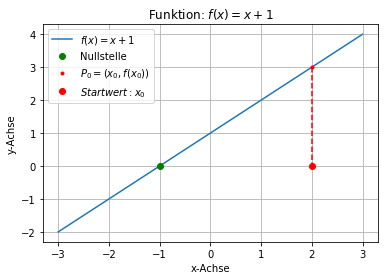

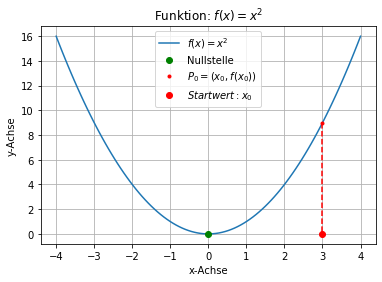

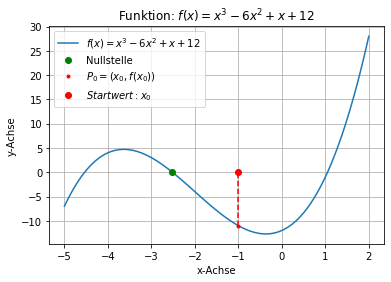

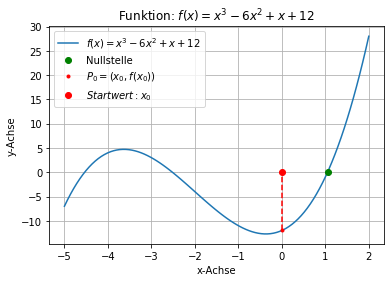

In [102]:
import numpy as np
import matplotlib.pyplot as plt


"""
Erstell für jede Funktion eine Graphen welche die
- Funktion,
- den berechnete Nullpunkt und
- den Startwert x0 und Punkt P0 darstellt.
"""

for f, x0, start, ende, f_text in funktionen:
    try:
        nullstellen_iterationen = solve(f, x0)
       
        # Daten für die Grafik aufbereiten
        x_values = np.linspace(start, ende, 100)
        y_values = []

        for x_value in x_values:
            y_value = f.subs(x, x_value)
            y_values.append(y_value)

        # Graphik erstellen
        plt.title(f'Funktion: {f_text}')
        plt.xlabel('x-Achse')
        plt.ylabel('y-Achse')
        plt.grid(True)
        
        # Funktion f in den Graphen zeichnen
        plt.plot(x_values, y_values, label=f_text)
        # Nullstelle in den Graphen zeichnen
        plt.plot(float(nullstellen_iterationen[-1]), 0, 'og', label='Nullstelle')
        # Startwert x0 und P0 in den Graphen zeichnen und mit vertikalen Liene verbinden
        plt.plot(x0, f.subs(x, x0), '.r', label=r"$P_0=(x_0, f(x_0))$")
        plt.plot(x0, 0, 'or', label=r"$Startwert: x_0$")
        plt.plot([float(x0), float(x0)], [f.subs(x, x0), 0], '--r')
        
        plt.legend()
        plt.show()
    except Exception as e:
        print(str(e))

Um herauszufinden wie schnell eine Funktion konvergieren, wird die Methode `solve` erweitert, dass bei jeder Iteration die Werte speichert und in einen Graphen überträgt.

Angenäherte Nullstelle: -1.00000000 nach 1 iterationen,


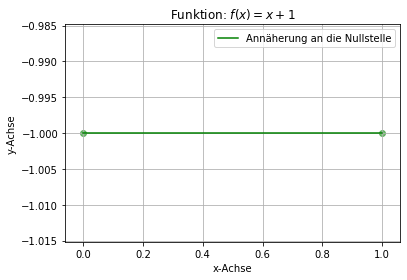

Angenäherte Nullstelle: 0.00000000 nach 51 iterationen,


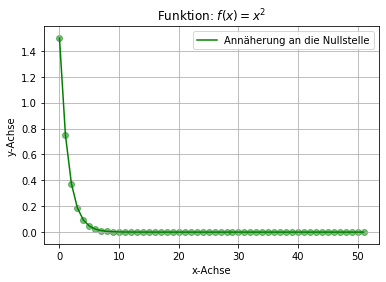

Angenäherte Nullstelle: -2.51730405 nach 6 iterationen,


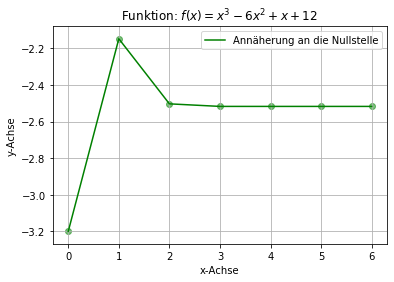

Angenäherte Nullstelle: 1.05137424 nach 7 iterationen,


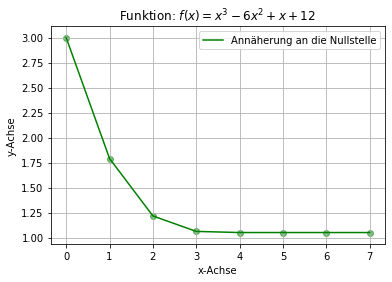

In [113]:
import numpy as np
import matplotlib.pyplot as plt


for f, x0, start, ende, f_text in funktionen:
    try:
        nullstellen, iteration = solve2(f, x0)
        print('Angenäherte Nullstelle: {:.8f} nach {} iterationen,'.format(float(nullstellen[-1]), iteration))
        
        # Graphik erstellen
        plt.title(f'Funktion: {f_text}')
        plt.xlabel('x-Achse')
        plt.ylabel('y-Achse')
        plt.grid(True)
        
        # Funktion f in den Graphen zeichnen
        plt.scatter(range(len(nullstellen)), nullstellen, color='g', alpha=0.5)
        plt.plot(range(len(nullstellen)), nullstellen, 'g', label="Annäherung an die Nullstelle")
        
        plt.legend()
        plt.show()
    except Exception as e:
        print(str(e))

Aus den Grafiken ist zu entnhemen, dass nach den ersten fünf iterationen die annäherung schon "sehr" genau ist und sich bei weiteren Iterationen wie bei der ersten Funktion $f_1$ als Gerade abbildet. Die zweite Funktion $f_2(x)=x^2$ ist wie die anderen Funktionen schon "sehr" nahe an der Nullstelle. Bei den darauf folgenden Iterationen wird die annäherung bei jeder Iteration genauer jedoch die annäherung wird immer kleiner.

## Fazit

Mit dem Newton-Verfahren ist es erstaunlich einfach, eine Nullstelle zu finden bzw. sich dieser anzunähern. Die Schwierigkeit liegt jedoch darin, den korrekten Startwert zu ermitteln. Denn wenn ein falscher Wert bestimmt wird, kann es entweder sehr lange dauern, bis die Nullstelle gefunden wird, da viele Iterationen nötig sind, oder es kann überhaupt keine Nullstelle gefunden werden.

## Litaraturverzeichnis

Matplotlib. (2020). *Matplotlib*. Abgerufen am 07.05.2020 von https://matplotlib.org/  
Sympy. (2020). *Sympy*. Abgerufen am 07.05.2020 von https://www.sympy.org/en/index.html  
NumPy Developers. (2020). *NumPy*. Abgerufen am 07.05.2020 von https://numpy.org/  
PTable. (2015). *PTable*. Abgerufen am 12.04.2020 von https://ptable.readthedocs.io/en/latest/tutorial.html   
mathelike. (2020). *Newton-Verfahren*. Abgerufen am 07.05.2020 https://www.mathelike.de/abi-check-mathe-abi-skript-bayern/1-analysis/1-5-differentialrechnung/1-5-5-newton-verfahren.html  
Mathepedia. (2020). *Mathepedia, Sekantenverfahren*. Abgerufen am 07.05.2020 https://mathepedia.de/Sekantenverfahren.html  